# 数理最適化
---
今回はpythonのライブラリで，数理最適化の時によく使われる'pulp'というもので簡単な連立不等式などを解いていきます．


強化学習の文脈でもLP問題に置き換えて解くという方法があります．

実際に例題を確認していきます．


---

(例題)

次の関数を4つの条件のもとで最大化せよ．

$$

\max \quad 3x - 5y + 10 \\
s.t.\quad x \geq 0 \\
y \geq 0 \\
x + y \leq 10 \\
8x + y \leq 15

$$

制約条件を図字するとこのようになり，この範囲内で最大化すれば良いことになります．
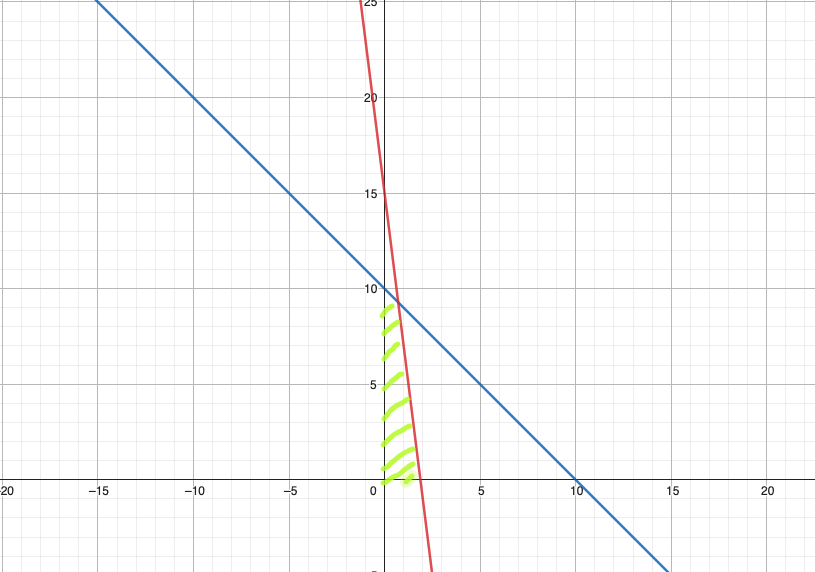

この問題を考えるときのpythonのコードはpulpを使うと以下のようになります．


In [9]:
import pulp

problem = pulp.LpProblem('LP',pulp.LpMaximize) #LP問題で最大化問題

#変数xとyを定義

x = pulp.LpVariable('x',cat='Continuous')
y = pulp.LpVariable('y',cat='Continuous')

#制約条件の追加

problem += x >= 0
problem += y >= 0
problem += x + y <= 10
problem += 8 * x + y <= 15

#最適したい式も追加する

problem += 3 * x - 5 * y + 10

status = problem.solve()

print(f'最適な時のxの値は{x.value()},yの値は{y.value()},その時の式の値は{problem.objective.value()}')


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ichiharayuuseimare/opt/anaconda3/envs/syumi-note/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/rn/8ylp503d60g0xr_qm3ghjknr0000gn/T/4d8e2e824ac2402e87813e7a70d5da89-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/rn/8ylp503d60g0xr_qm3ghjknr0000gn/T/4d8e2e824ac2402e87813e7a70d5da89-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 26 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-4) rows, 0 (-2) columns and 0 (-6) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 5.625
After Postsolve, objective 5.625, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 5.625 - 0 iterations time 0.002, Presolve 0.00
Option f

解けました.